(506, 14)
20.831


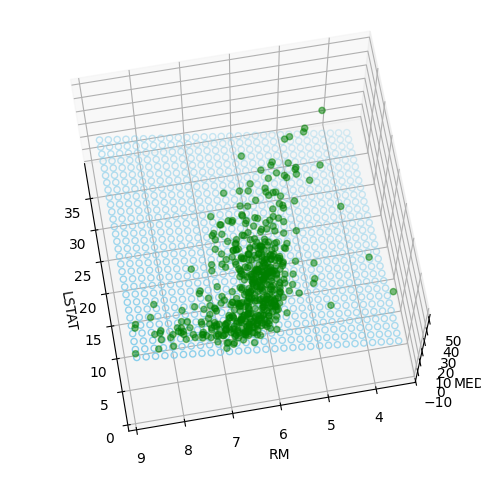

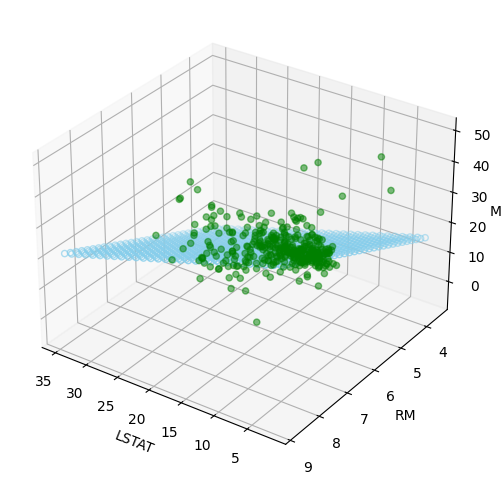

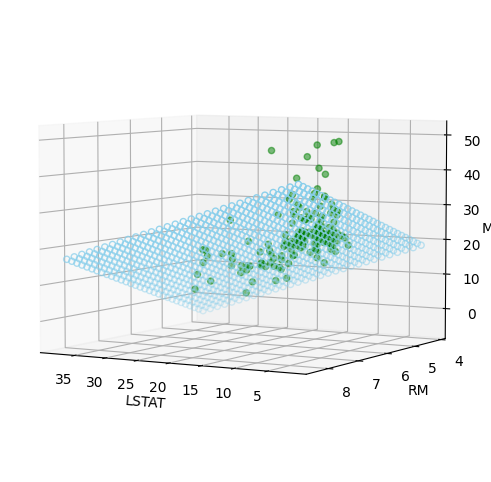

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch10/housing.data.txt"
df = pd.read_csv(filepath_or_buffer=url, header = None, sep = "\s+")
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
print(df.shape)
df.head()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D
X = df[['LSTAT', 'RM']].values
y = df['MEDV'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 55)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_train_std = sc_x.fit_transform(X_train)
y_train_std = sc_y.fit_transform(y_train[:, np.newaxis])
X_test_std = sc_x.fit_transform(X_test)
y_test_std = sc_y.fit_transform(y_test[:, np.newaxis])
from sklearn.kernel_approximation import RBFSampler
R = RBFSampler(gamma = 0.5, random_state = 10)
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.5, random_state = 200)
X_features = R.fit_transform(X_train_std)
ridge.fit(X_features, y_train)
X_test_features = R.transform(X_test_std)
y_test_features = ridge.predict(X_test_features)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, ridge.predict(X_test_features))
print("%.3f" %(mse))
regr = LinearRegression()
regr.fit(X, y)
from mpl_toolkits.mplot3d import Axes3D

X_array = [X[:,0], X_train[:,0], X_test[:,0]]
y_array = [X[:,1], X_train[:,1], X_test[:,1]]
z_array = [y, y_train, y_test]
a = [70, 30, 5]
b = [170, 125, 120]
c = []
for i in range(3):
  x = X_array[i]
  y = y_array[i]
  z = z_array[i]
  fig = plt.figure(figsize = (18,6))
  ax = fig.add_subplot(111, projection = '3d')
  x_pred = np.linspace(x.min(), x.max(), 30)
  y_pred = np.linspace(y.min(), y.max(), 30)
  xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
  model = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
  z_pred = regr.predict(model)
  ax.scatter(x,y,z, color = 'g', zorder = 15, alpha = 0.5)
  ax.scatter(xx_pred, yy_pred, z_pred, facecolor = (0,0,0,0), edgecolor='skyblue')
  ax.set_xlabel('LSTAT', fontsize = 10)
  ax.set_ylabel('RM', fontsize = 10)
  ax.set_zlabel('MEDV', fontsize = 10)
  ax.view_init(a[i], b[i])
  plt.show()